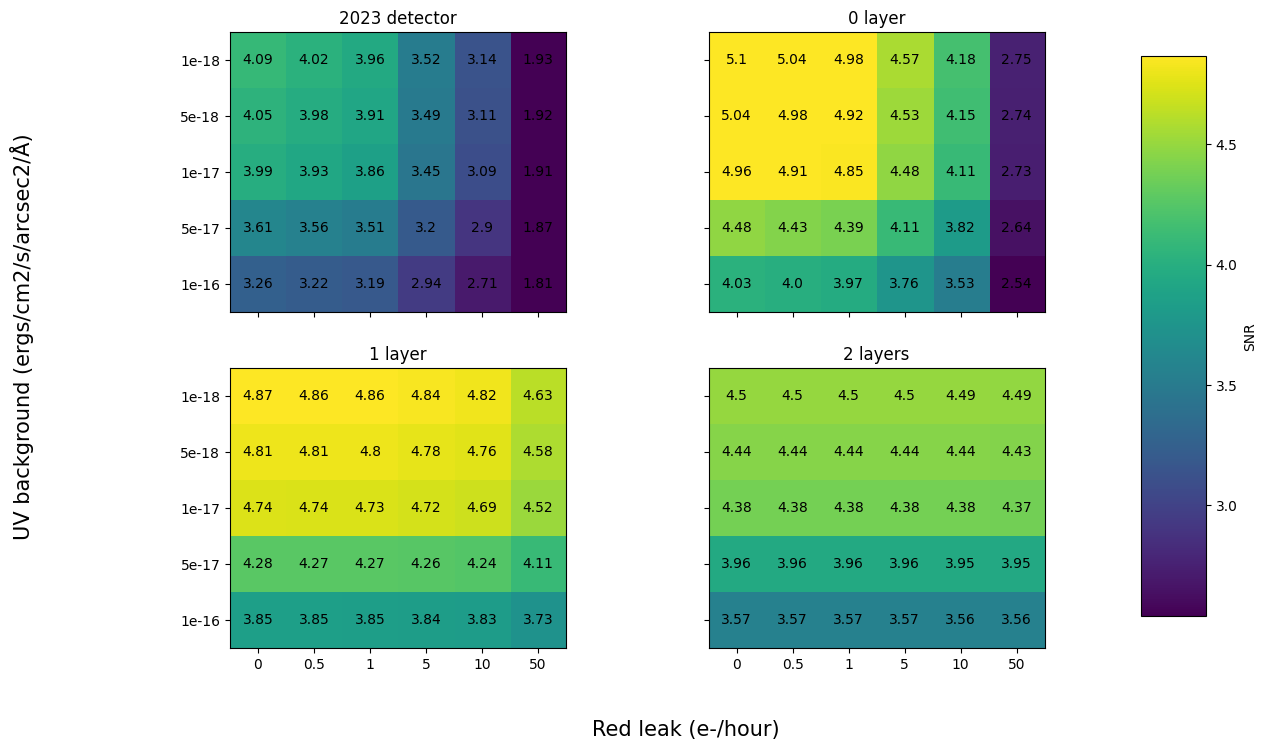

In [8]:

from Observation import *




skys = [1e-18,5e-18, 1e-17,5e-17, 1e-16]
# skys = [1e-18,1e-17,1e-16]
extras = [0.5,2,7,22]
extras = [0,0.5,1,5,10,50]#,100,500]

no = np.zeros((len(extras),len(skys))).T
l0 = np.zeros((len(extras),len(skys))).T
l1 = np.zeros((len(extras),len(skys))).T
l2 = np.zeros((len(extras),len(skys))).T


# sys.path.append("/Users/Vincent/Github/fireball2-etc")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks")
# sys.path.append("/Users/Vincent/Github/fireball2-etc/notebooks/interpolate")

for j, sky in enumerate(skys):
    for i, extra in enumerate(extras):
        no[j,i] = np.unique(Observation(Signal=2e-16,Sky=sky, Dard_current=1,extra_background=extra, QE=0.48,i=20).snrs)
        l0[j,i] = np.unique(Observation(Signal=2e-16,Sky=sky, Dard_current=1, extra_background=extra, QE=0.72,i=20).snrs)
        l1[j,i] = np.unique(Observation(Signal=2e-16,Sky=sky,  Dard_current=1, extra_background=extra/25, QE=0.66,i=20).snrs)
        l2[j,i] = np.unique(Observation(Signal=2e-16,Sky=sky,  Dard_current=1, extra_background=extra/25/25, QE=0.57,i=20).snrs)



# fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(6,4))
fig, axes = plt.subplots(2,2,sharex=True, sharey=True,figsize=(13,8))
fig.subplots_adjust(right=0.8)
for ax, a,n in zip(axes.flatten(), [no,l0,l1,l2],["2023 detector","0 layer","1 layer","2 layers"]) :
    im = ax.imshow(a, vmin=np.min(l0), vmax=np.max(l1))
    for (j,i),label in np.ndenumerate(a):
        ax.text(i,j,np.round(label,2),ha='center',va='center')
    ax.set_title(n)
    ax.set_xticklabels([0] + extras)
    ax.set_yticklabels([0] + skys)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.text(0.5, 0.0,'Red leak (e-/hour)', ha='center',fontsize=15)
fig.text(-0.02, 0.5, 'UV background (ergs/cm2/s/arcsec2/Å)', va='center', rotation='vertical',fontsize=15)
fig.colorbar(im, cax=cbar_ax,label="SNR")



In [ ]:
# no = np.array([[10.4, 	8.8, 	6.3,	4.2],
# [9.1	, 8,	6	, 4.1],
# [5,	4.8,	4.2,	3.4]])

# l0 = np.array([[19.3,	16.3,	11.6,	7.7],
# [15.2,	13.6,	10.5,	7.3],
# [7.1	,6.9	,6.3	,5.4]])


# l1 = np.array([[19.5,19.2,	18.3,	16.6],
# [15.1,15	,14.5	,13.4],
# [6.9,6.8	,6.8	,6.7]])

# l2 = np.array([[17.2,	17.2,	17.2,	17],
# [13.6,	13.6,	13.5,	13.4],
# [6.2	,6.3	,6.3	,6.3]])